In [29]:
#!pip install calplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import calplot

In [15]:
df = pd.read_csv('data/AllIndiaBulletins_Master.csv')
df = df[df.City == 'Varanasi']
df['date'] = pd.to_datetime(df['date'])

C:\Users\dskcy\AppData\Local\Temp\ipykernel_9300\3516854169.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/AllIndiaBulletins_Master.csv')


In [16]:
# Create a dataframe with a single column - dates from 2015 to 2023
daily_dates = pd.date_range(start='2016-01-01', end='2023-12-31', freq='D')
template = pd.DataFrame({'date': daily_dates})

In [17]:
df = template.merge(df, on='date', how='left') #Remove this code if you dont want years without data in calendar

In [18]:
df.set_index('date', inplace=True)

# Replace all NULLS with -1 (grey out on map)
df = df.fillna(-1)
df

,City,No. Stations,Air Quality,Index Value,Prominent Pollutant
date,,,,,
2016-01-01,Varanasi,1,Severe,466.0,PM2.5
2016-01-02,Varanasi,1,Severe,461.0,PM2.5
2016-01-03,Varanasi,1,Severe,446.0,PM2.5
2016-01-04,Varanasi,1,Severe,419.0,PM2.5
2016-01-05,Varanasi,1,Severe,461.0,PM2.5
...,...,...,...,...,...
2023-12-27,Varanasi,4,Satisfactory,96.0,PM10
2023-12-28,Varanasi,4,Satisfactory,96.0,PM10
2023-12-29,Varanasi,4,Satisfactory,80.0,PM10


In [21]:
## CALENDAR HEATMAP
# Define the colormap ranges and colors
aqi_ranges = [0, 50, 100, 200, 300, 400, 500]
aqi_colors = ['#eeeeeeff', # Null values are replaced with -1 - this color is for that - remove it if null calendary years are not needed
              '#274e13ff', '#93c47dff', '#f2f542', '#f59042', '#ff0000', '#753b3b']

In [22]:
# Define the conditions for each category
conditions = [
    (df['Index Value'] < 0), # Null values are replaced with -1 - this category is for that - remove it if null calendary years are not needed
    (df['Index Value'] <= 50),
    (df['Index Value'] > 50) & (df['Index Value'] <= 100),
    (df['Index Value'] > 100) & (df['Index Value'] <= 200),
    (df['Index Value'] > 200) & (df['Index Value'] <= 300),
    (df['Index Value'] > 300) & (df['Index Value'] <= 400),
    (df['Index Value'] > 400)
]

In [23]:
categories = [1, 2, 3, 4, 5, 6, 7] #Should be 6 - +1 for the null value category.
df['AQI'] = np.select(conditions, categories, default='outlier')
df['AQI'] = df['AQI'].astype(int)

aqi_colors = [aqi_colors[i-1] for i in sorted(df['AQI'].unique())]

In [26]:
# Create a custom discrete colormap for AQI
cmap = ListedColormap(aqi_colors)

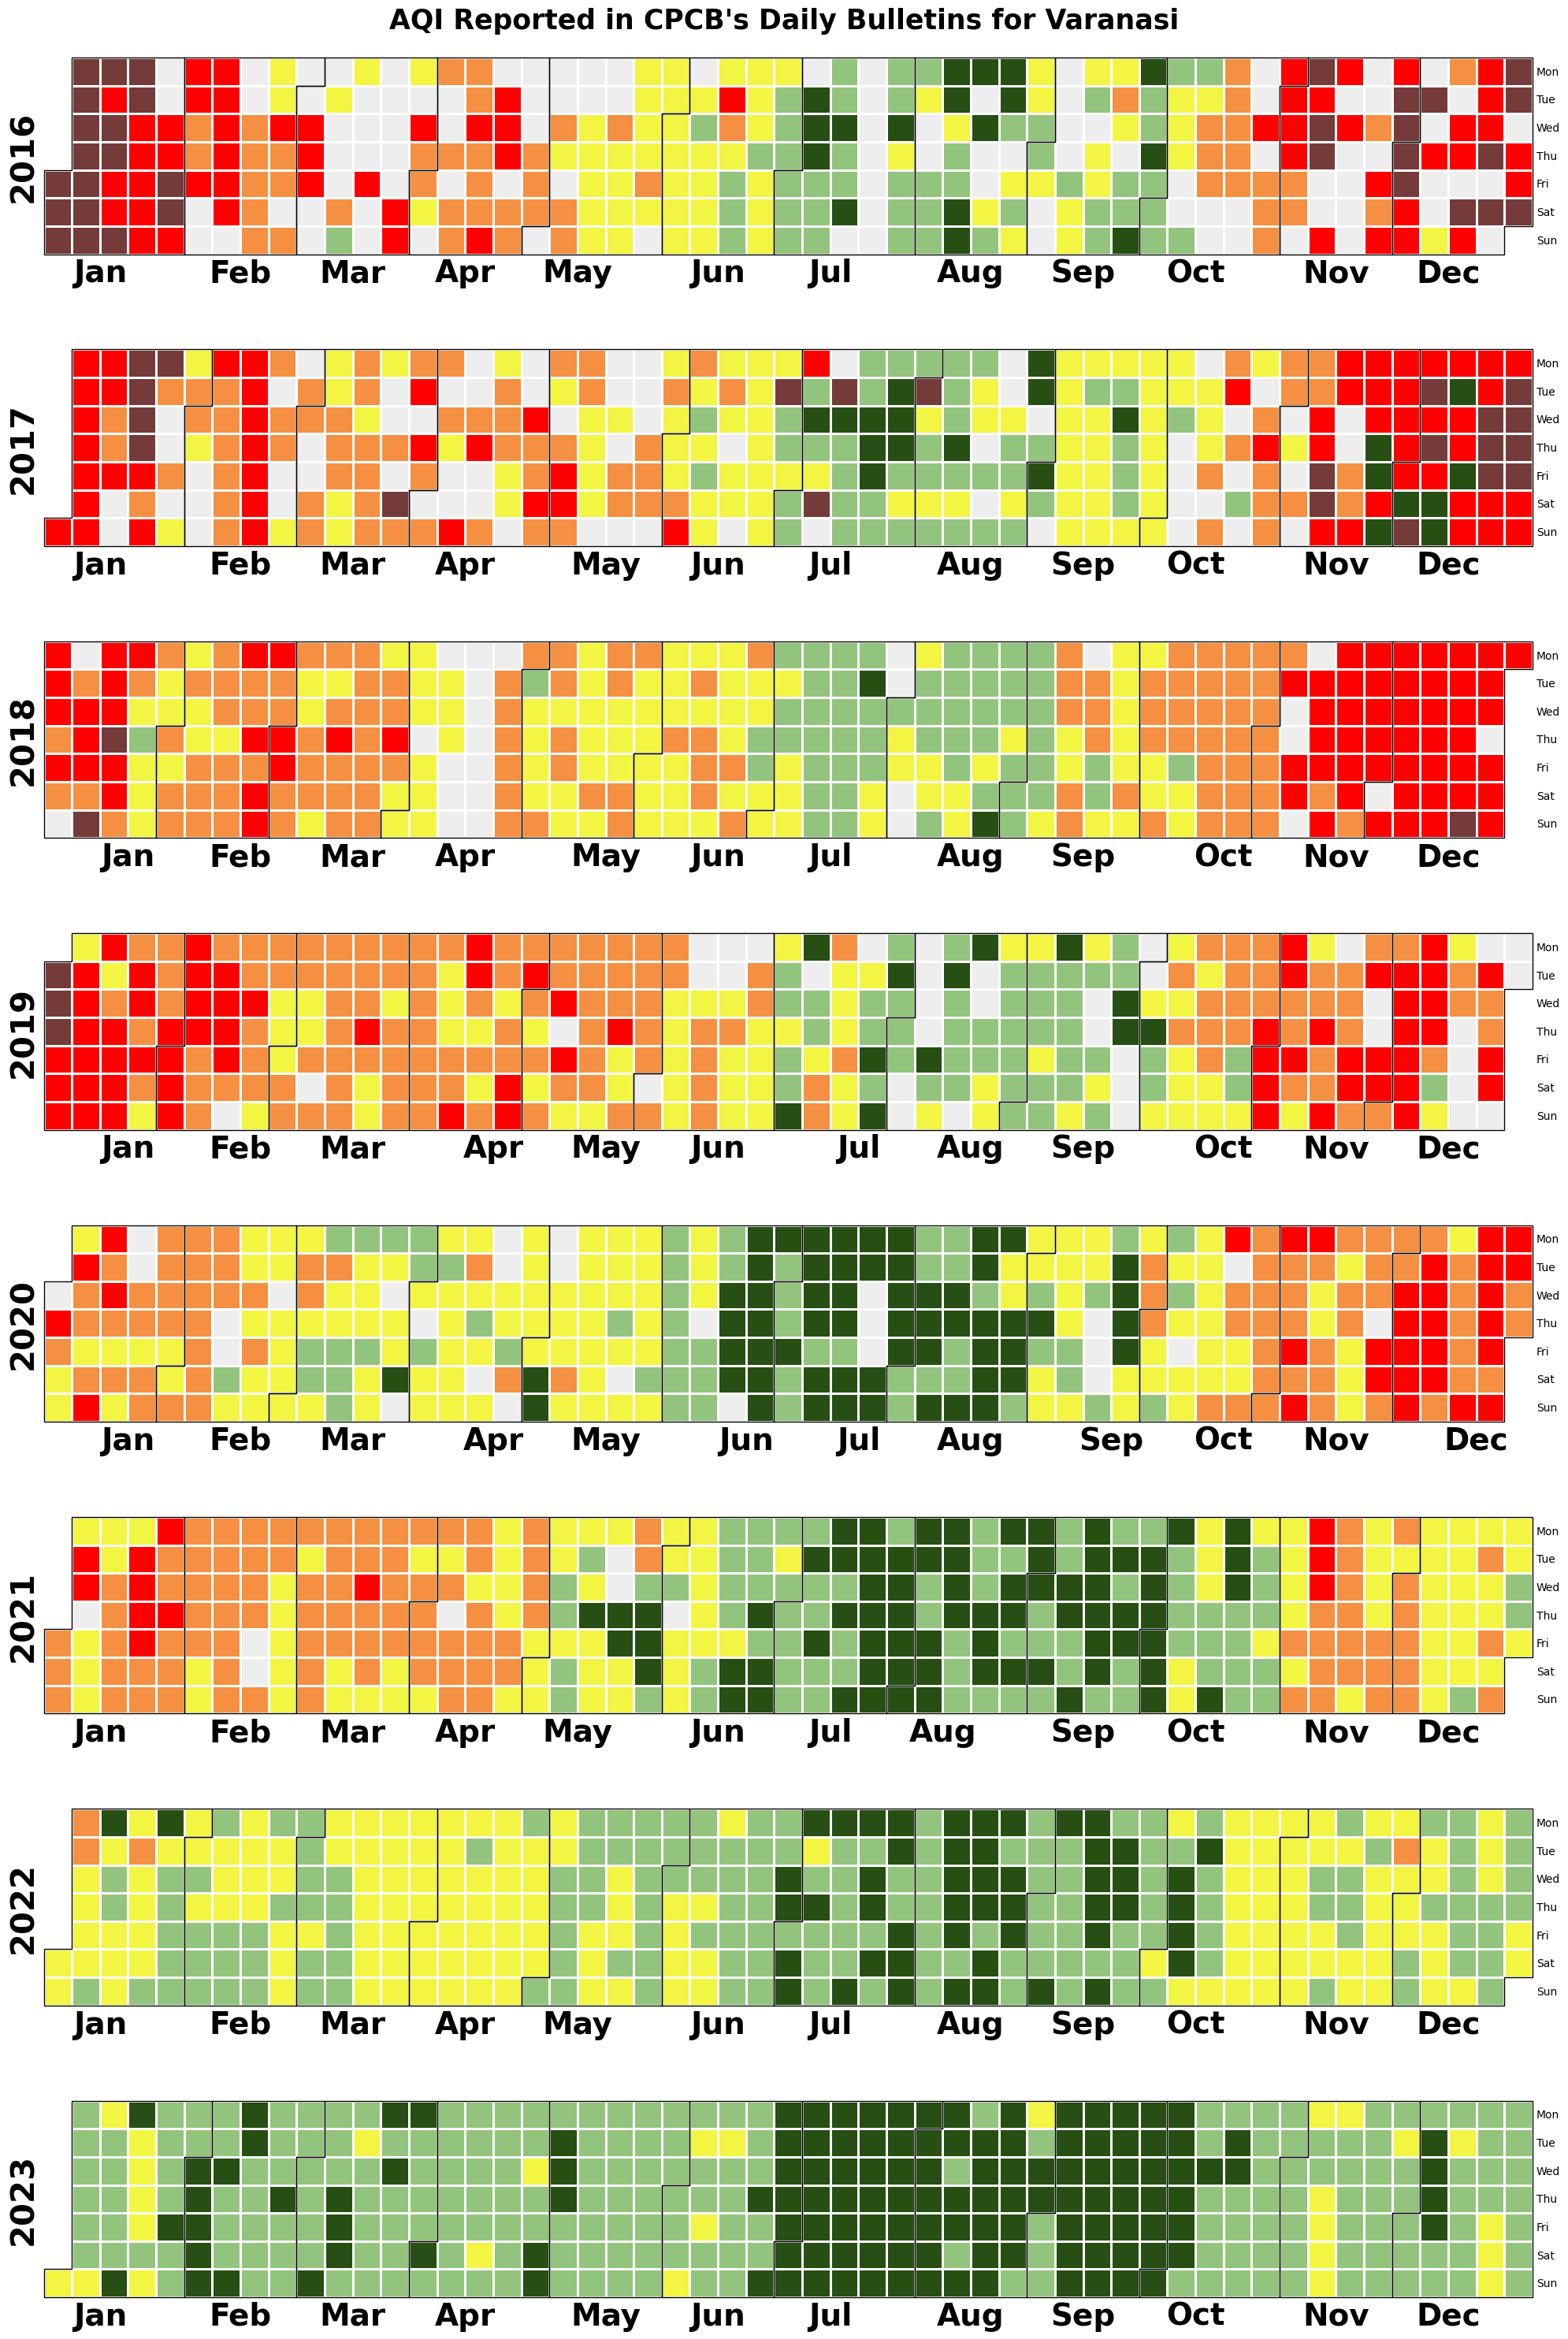

In [38]:
calplot.calplot(df['AQI'],
                yearascending = True,
                colorbar = False, #Legend

                yearlabels = True,
                yearlabel_kws = {'fontsize': 30, 'color': 'black', 'fontname':'sans-serif'},

                suptitle = "AQI Reported in CPCB's Daily Bulletins for Varanasi",
                suptitle_kws = {'fontsize': 25, 'x': 0.5, 'y': 0.995, 'fontweight':'bold', 'fontname':'sans-serif'},
                
                cmap=cmap,

                linecolor = 'white', linewidth = 1,
                edgecolor = 'black',

                #textformat = '{:.0f}', textfiller = '-', textcolor = 'black'

                figsize=(20,30)
                )
##OPTIONAL FORMATTING
# Iterate over each subplot and set xtick labels to bold
for ax in plt.gcf().get_axes():
    fontsize = 28
    fontweight = 'bold'
    fontproperties = {'weight' : fontweight, 'size' : fontsize}
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontdict = fontproperties)
    #ax.tick_params(axis="x", labelsize=28, weight='bold')
#plt.xticks(fontweight='bold', fontsize=28)

plt.savefig('visuals/calendarheatmap.png')